In [287]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
# loading data
data=pd.read_excel("Airlines+Data.xlsx",parse_dates=True)

In [289]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


Dataset is Univarient Time Series Data i.e Date Vs Target

Before doing anything else with the data let's see if there are any null values (missing data) in any of the columns.

In [290]:
data.shape

(96, 2)

dataset has 96 rows and 2 columns.

In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [292]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

No Missing values and datatype also identified accuretly

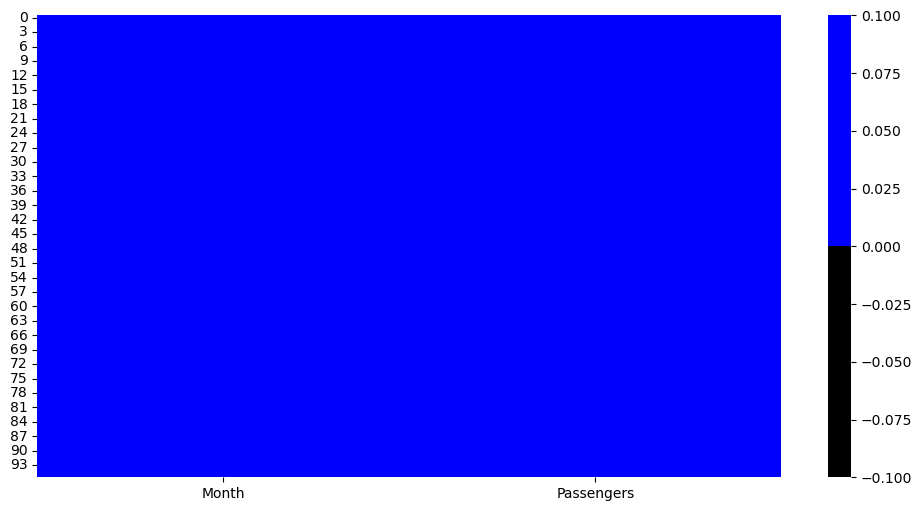

In [293]:
# Plot the heatmap to find more about Missing values

plt.figure(figsize=(12,6))
cols=data.columns
colors=['black','blue']

sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colors))
plt.show();

In [294]:
# Summary of numerical attributes:
# In essence, it is descriptive statistics (count, mean, standard deviation, minimum value, maximum value, and 25% - 50% - 75% percentile)
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


describe function shows only numerical columns information

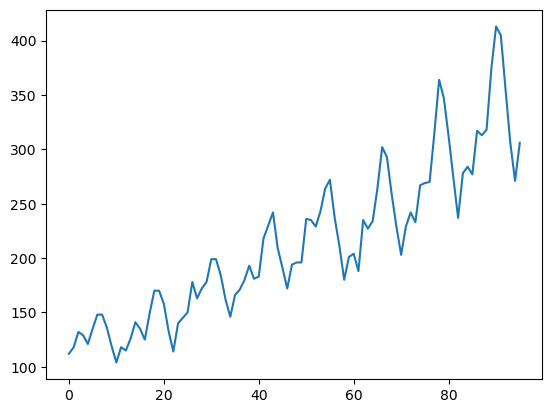

In [295]:
#line plt
data.Passengers.plot()
plt.show()

It shows dataset has exponetial trends with multiplicative seasonality

# Histogram and Density Plots of target column

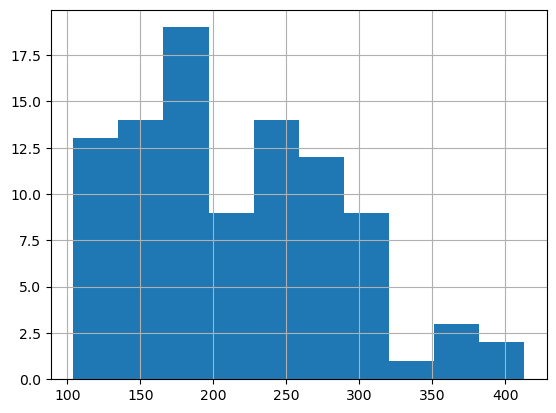

In [296]:
# target should be normally distributed if not then treat it
data['Passengers'].hist()
plt.show()

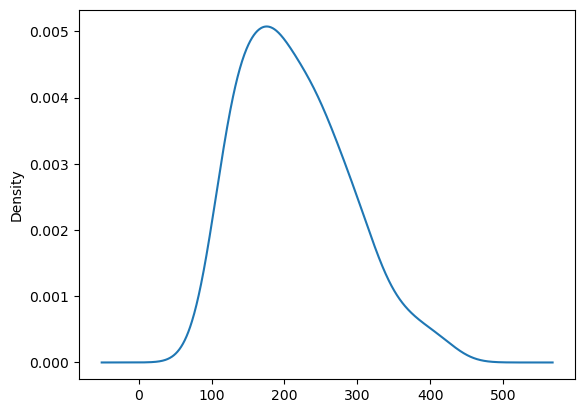

In [297]:
# create a density plot
data['Passengers'].plot(kind='kde')
plt.show()

Sales column is slightly Right skewed.

So we have to apply square-root transformation to convert it into normal distribution.

Sales have average value between 200 and standard deviation is in range of 150-250.

In [298]:
data.skew()

C:\Users\PallaviJadhav\AppData\Local\Temp\ipykernel_21064\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Passengers    0.637375
dtype: float64

In [299]:
data.Passengers=np.sqrt(data.Passengers)
data.Passengers.skew()

0.31587257587044365

If skewness is between -0.5 and 0.5, the distribution is approximately symmetric

<AxesSubplot:>

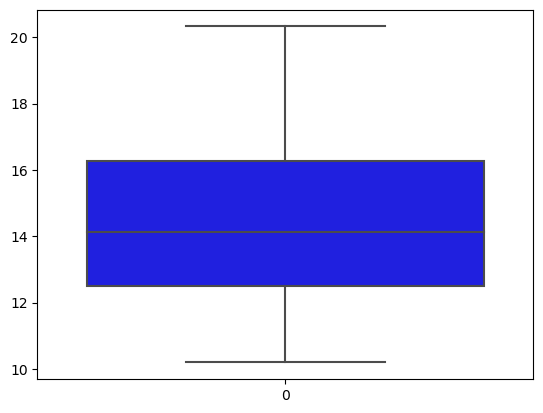

In [300]:
sns.boxplot(data=data['Passengers'],color='blue')

Passenger colunm is slightly right skewd with majority of data is in range of 12 to 16 with median value is 14

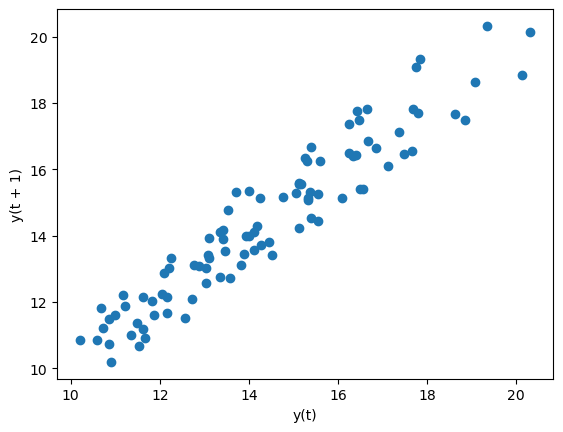

In [301]:
# lagplot-it is scatterplot between target Vs target with 1 delay(lag)
from pandas.plotting import lag_plot
lag_plot(data['Passengers'])
plt.show()

from above lag plot it shows that,feature and target are highly positively correlated with each other,That means  Forecasting for Passangers are possible

# Moving Average

<AxesSubplot:>

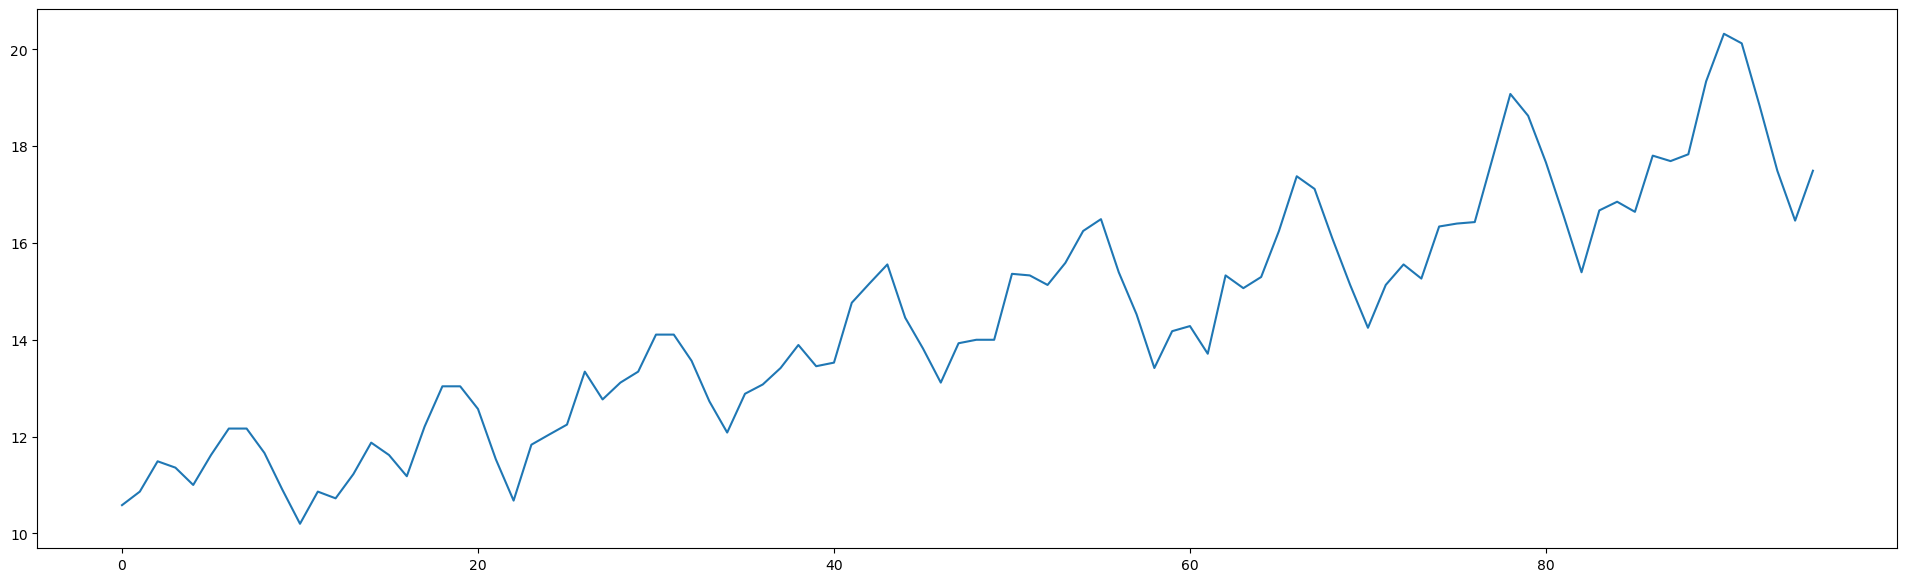

In [302]:
plt.figure(figsize=(24,7))
data.Passengers.plot()

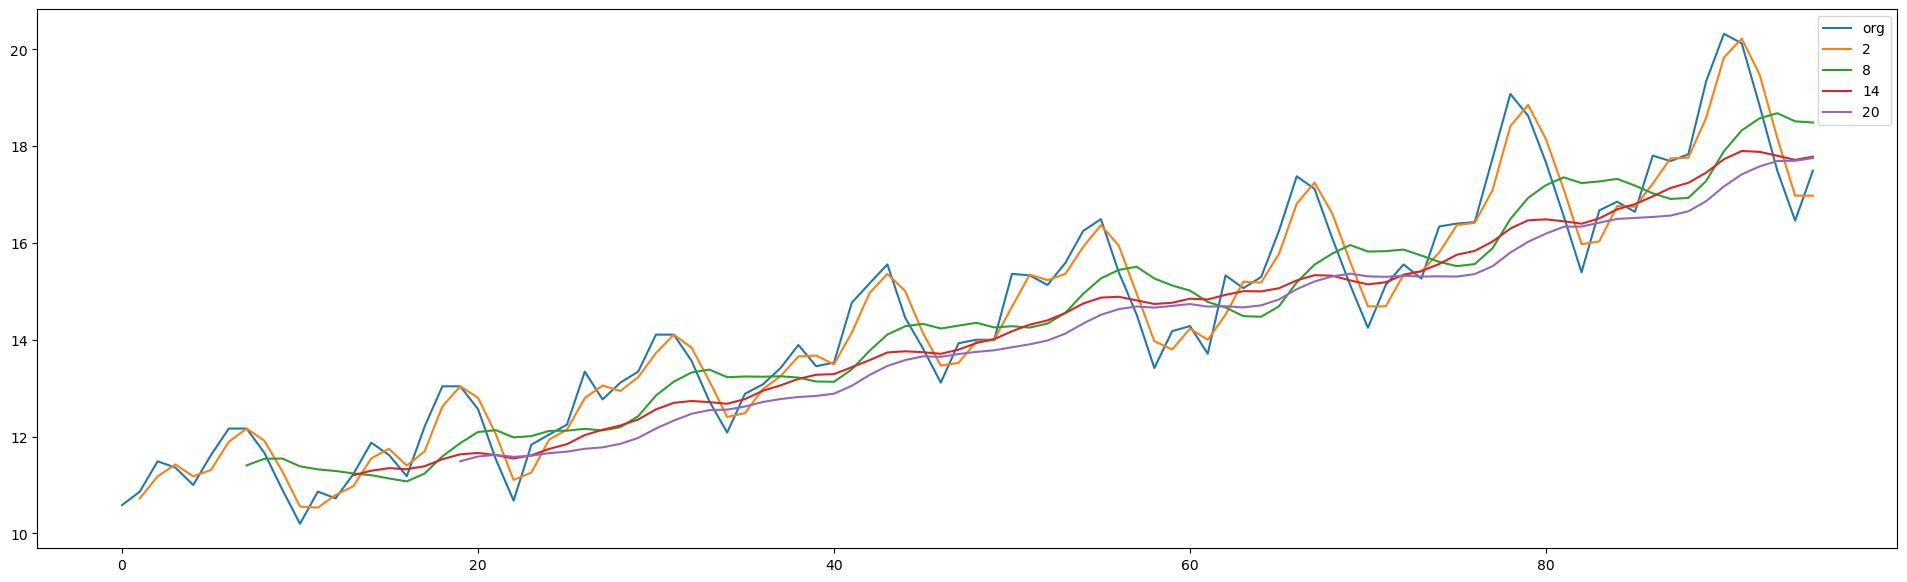

In [303]:
plt.figure(figsize=(24,7))
data.Passengers.plot(label="org")
for i in range(2,24,6):
    #plt.figure(figsize=(24,7))
    data["Passengers"].rolling(i).mean().plot(label=str(i))
    #plt.title("MA"+str(i))
plt.legend(loc='best')

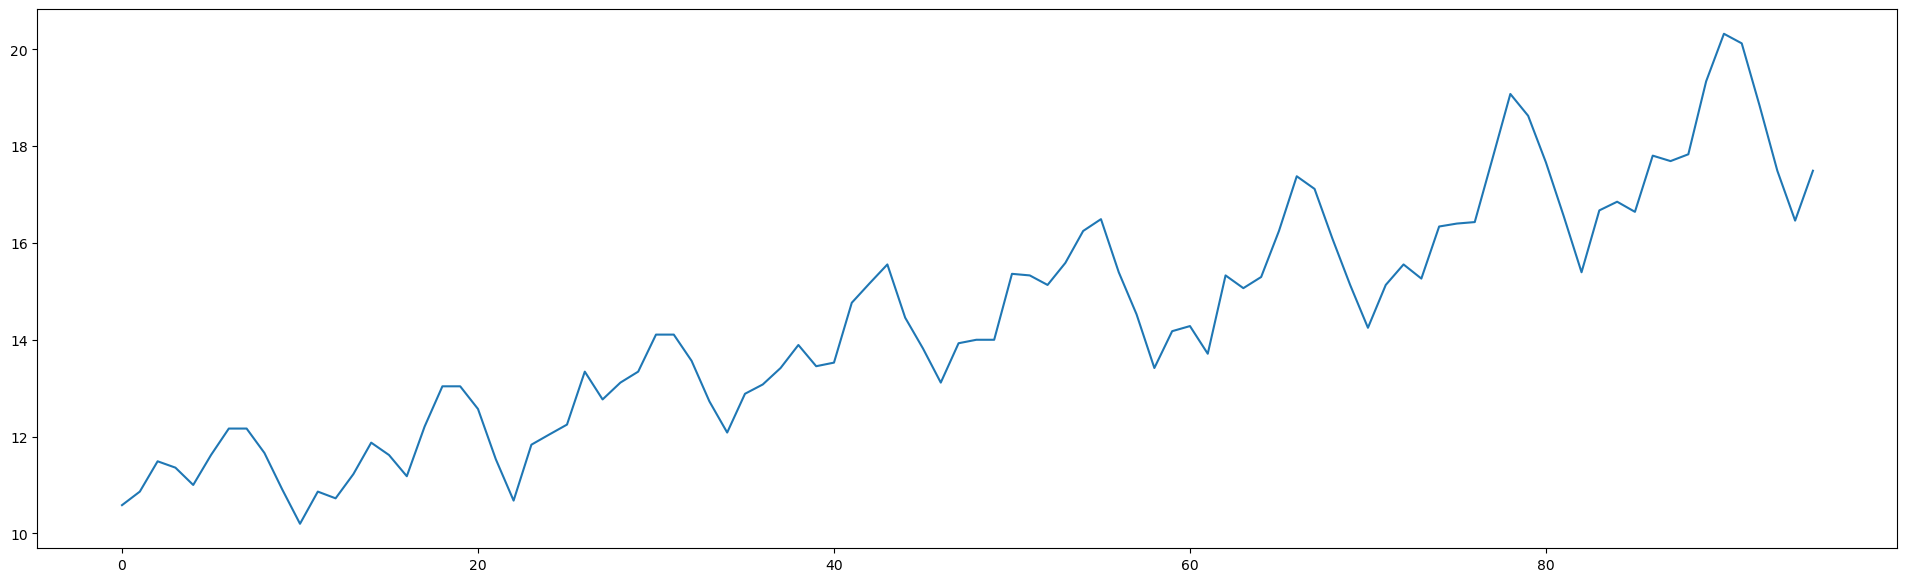

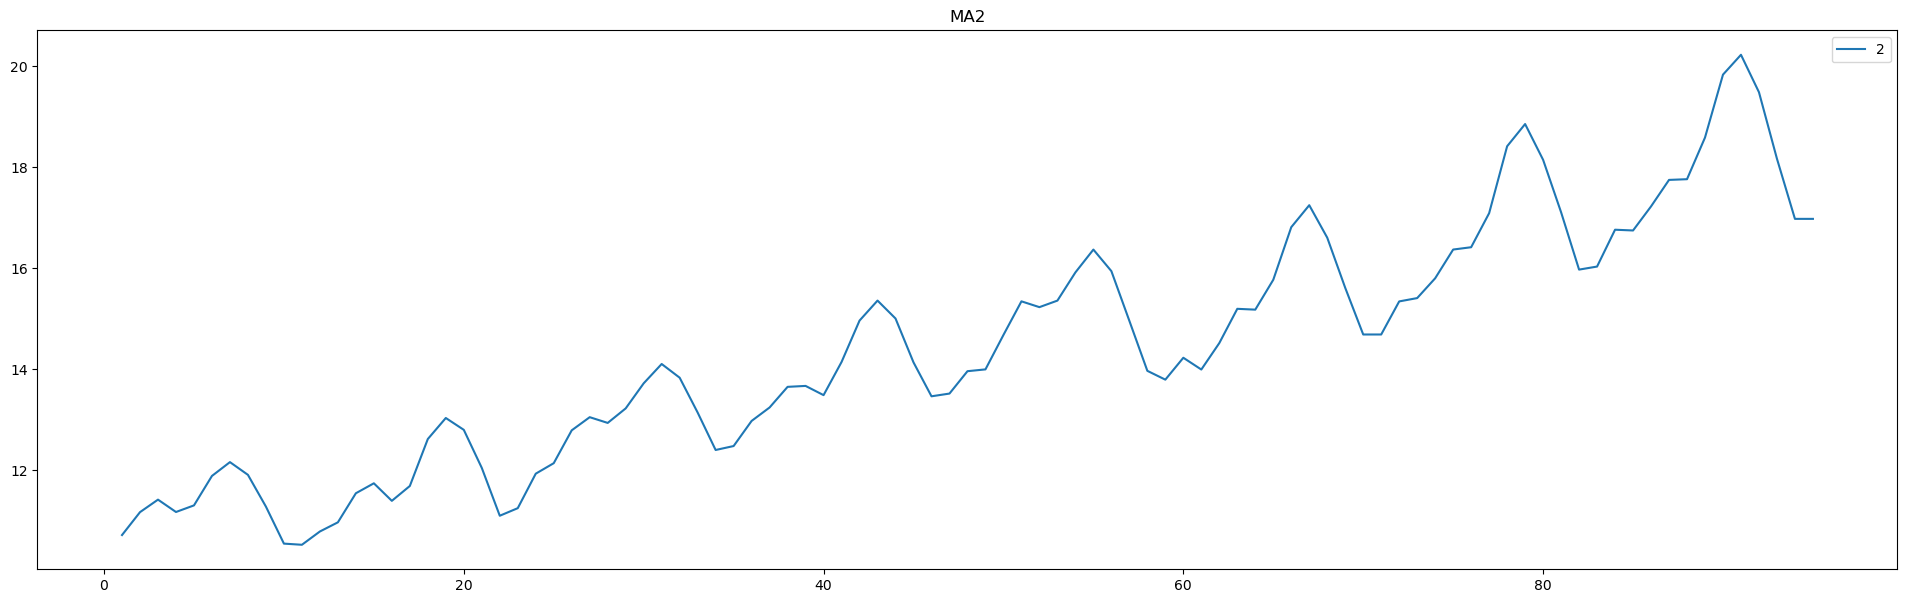

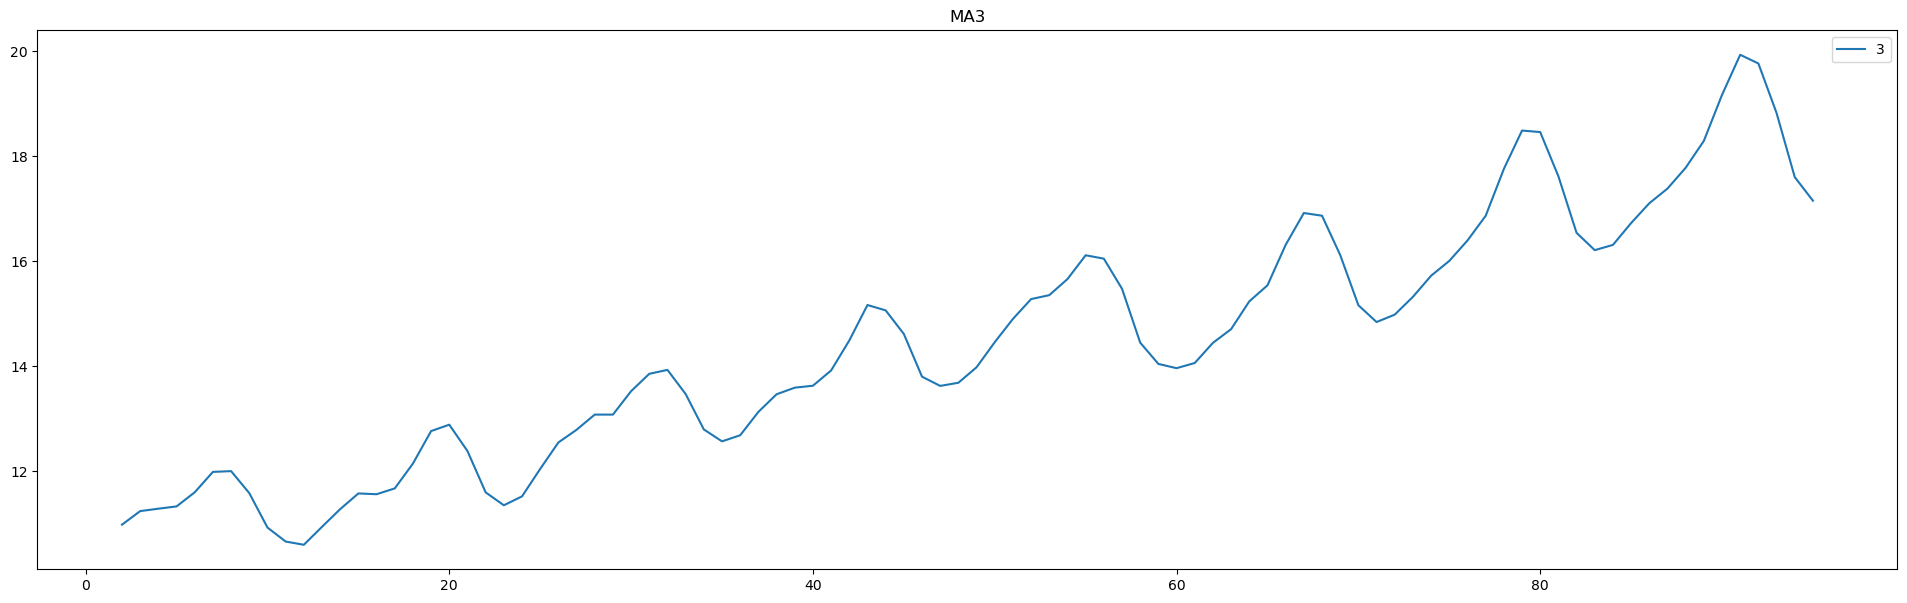

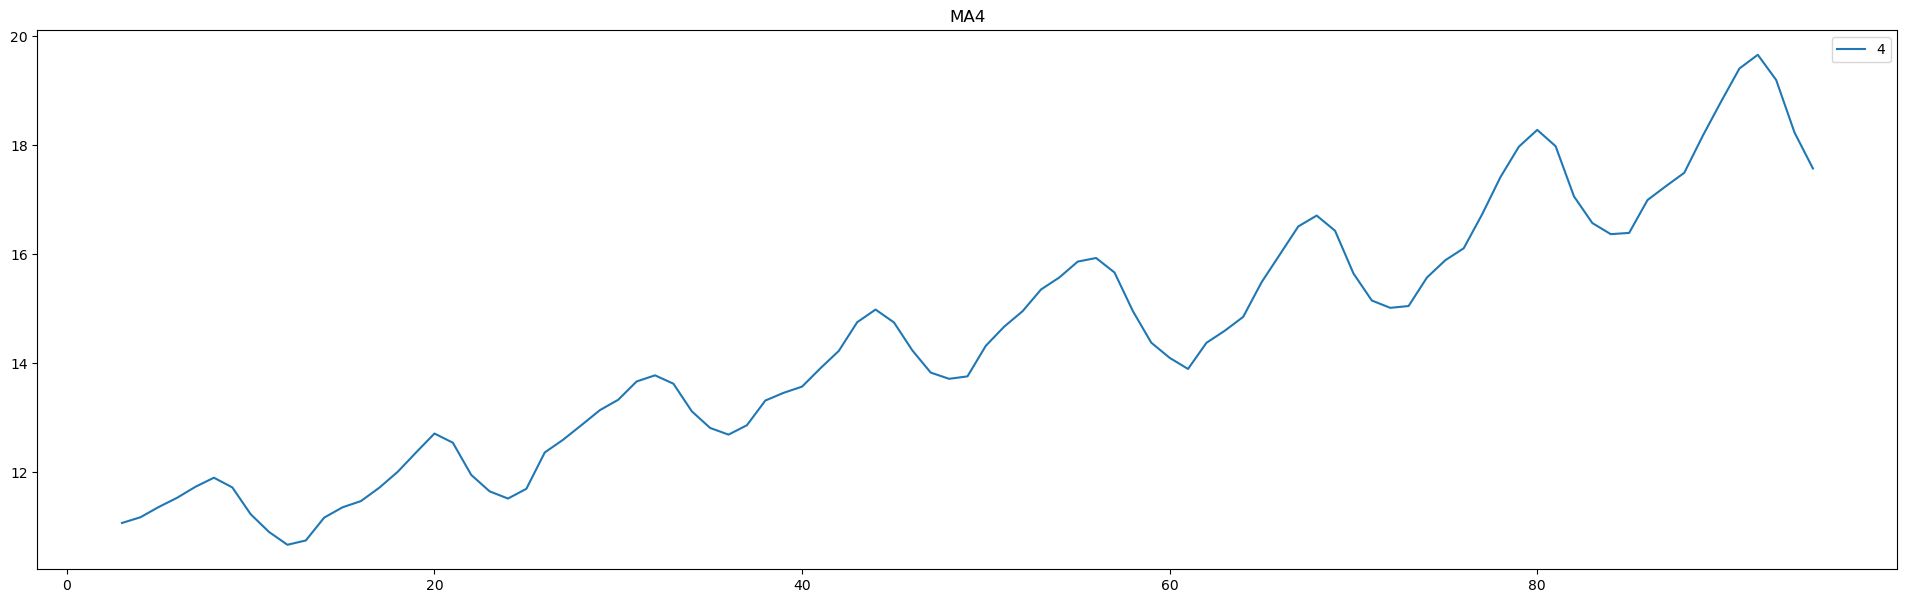

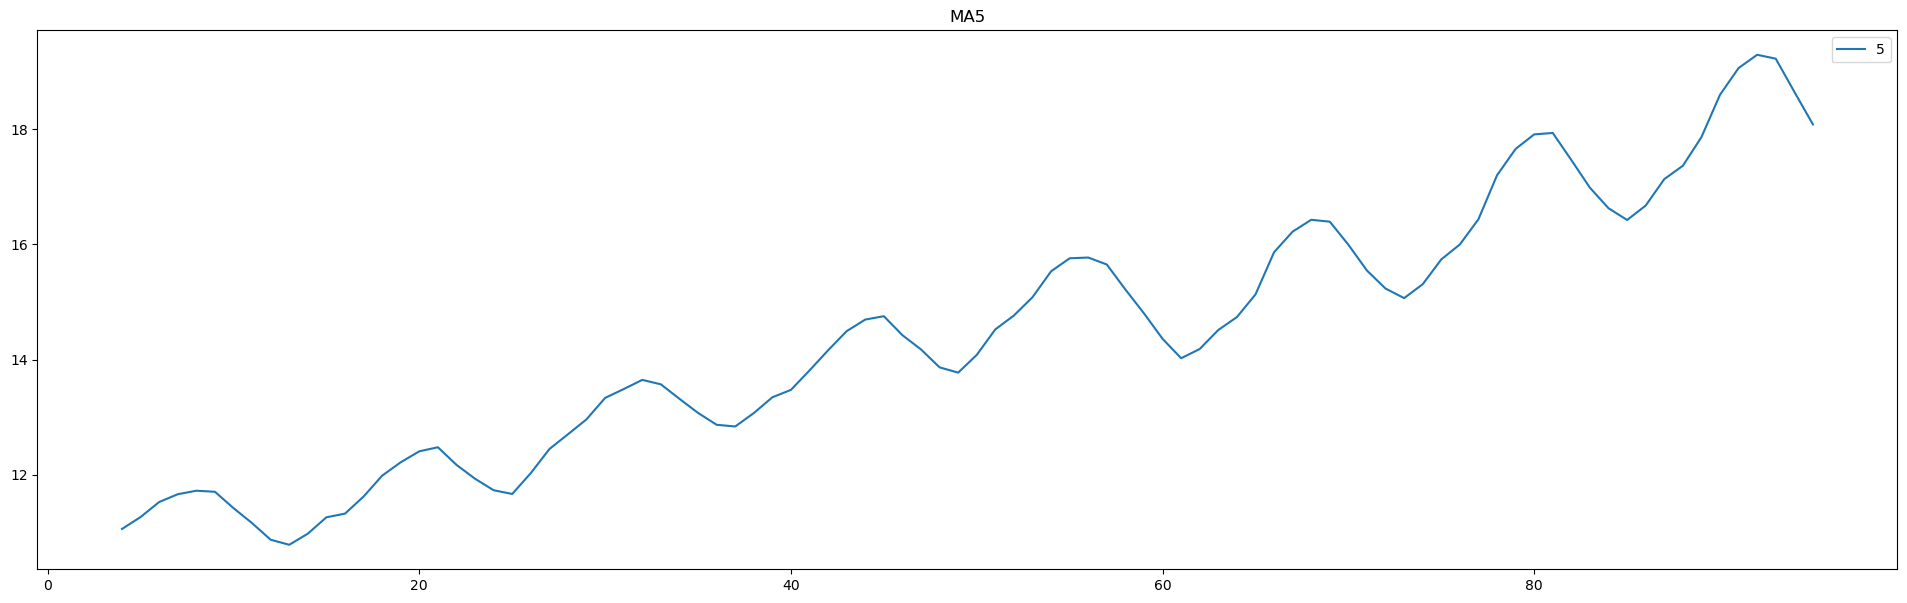

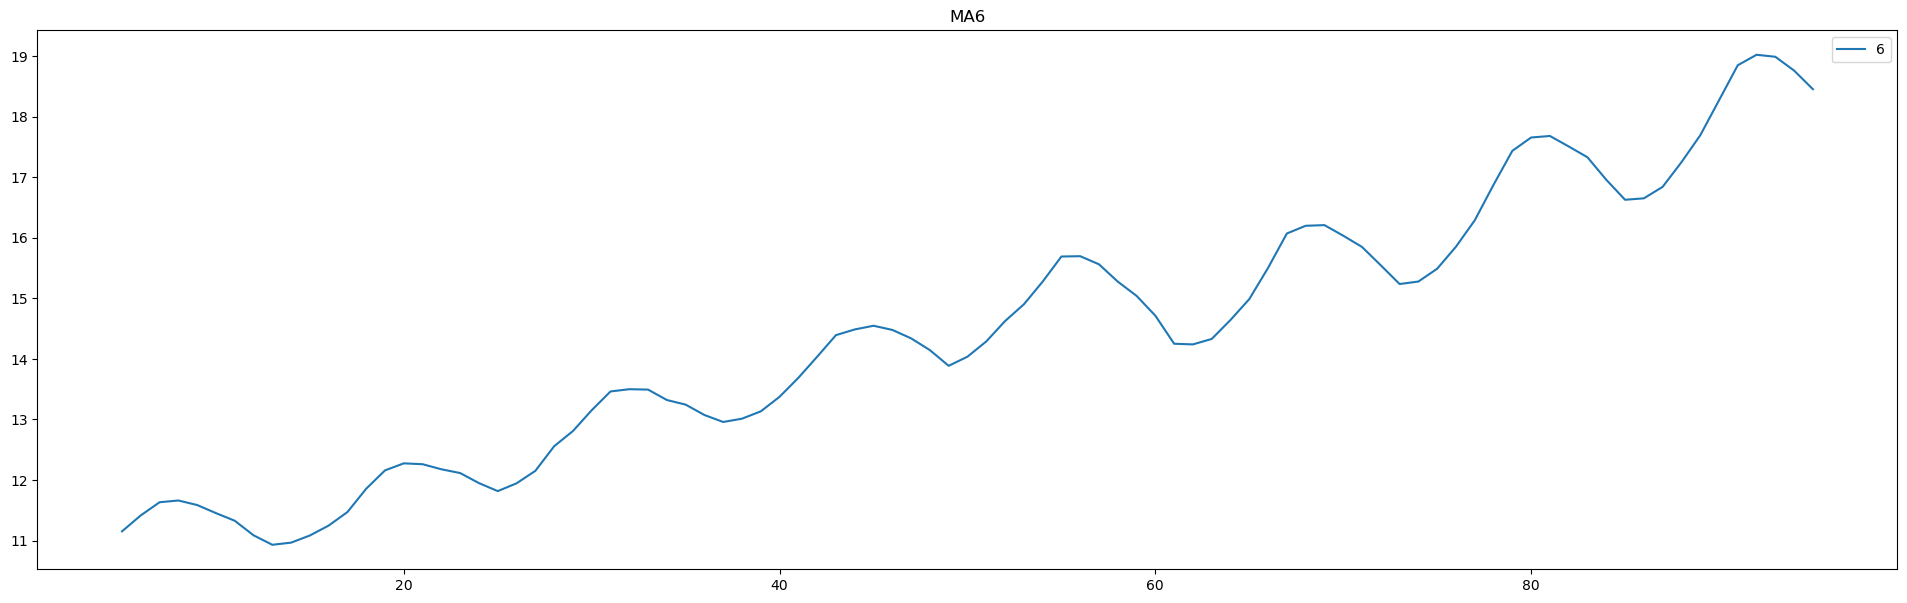

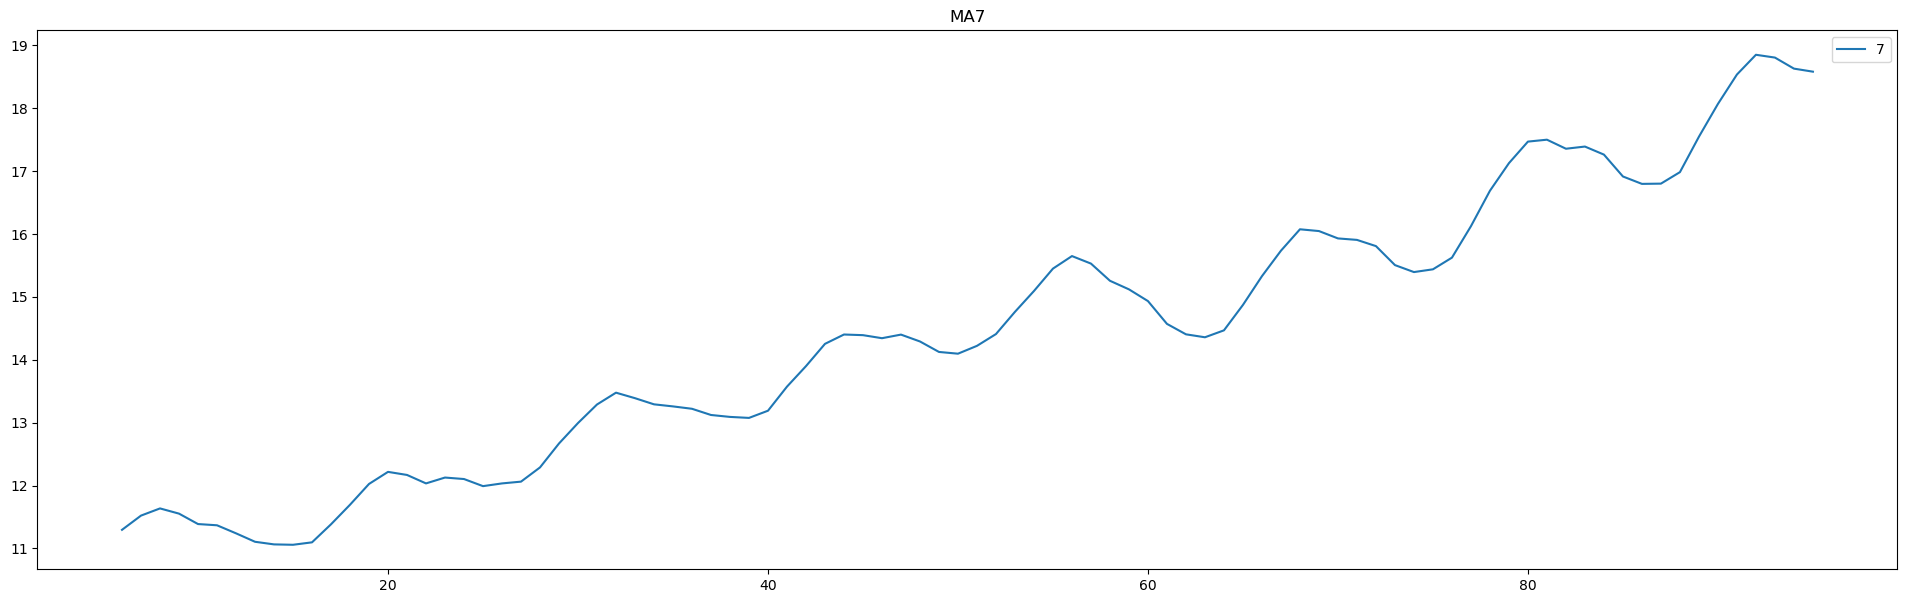

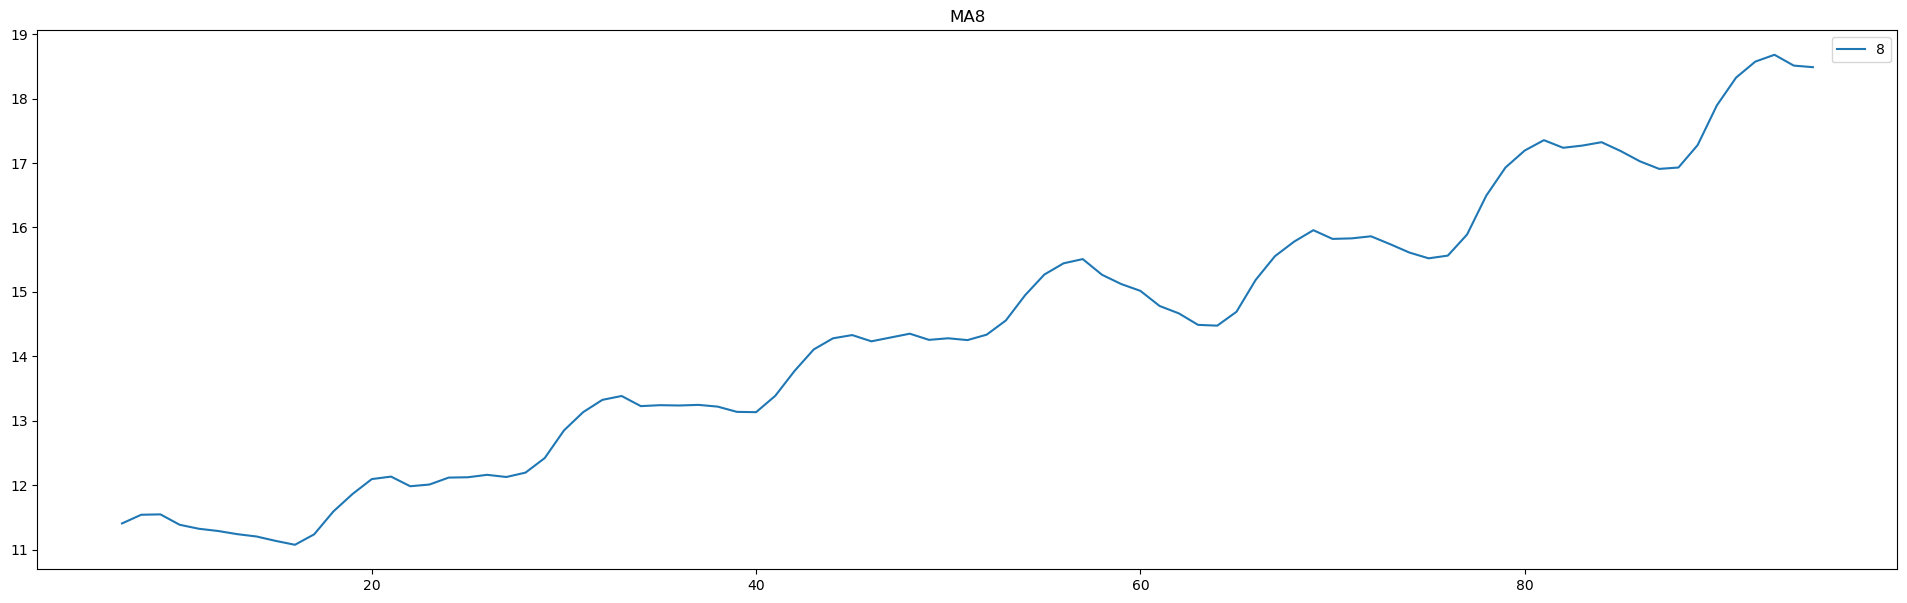

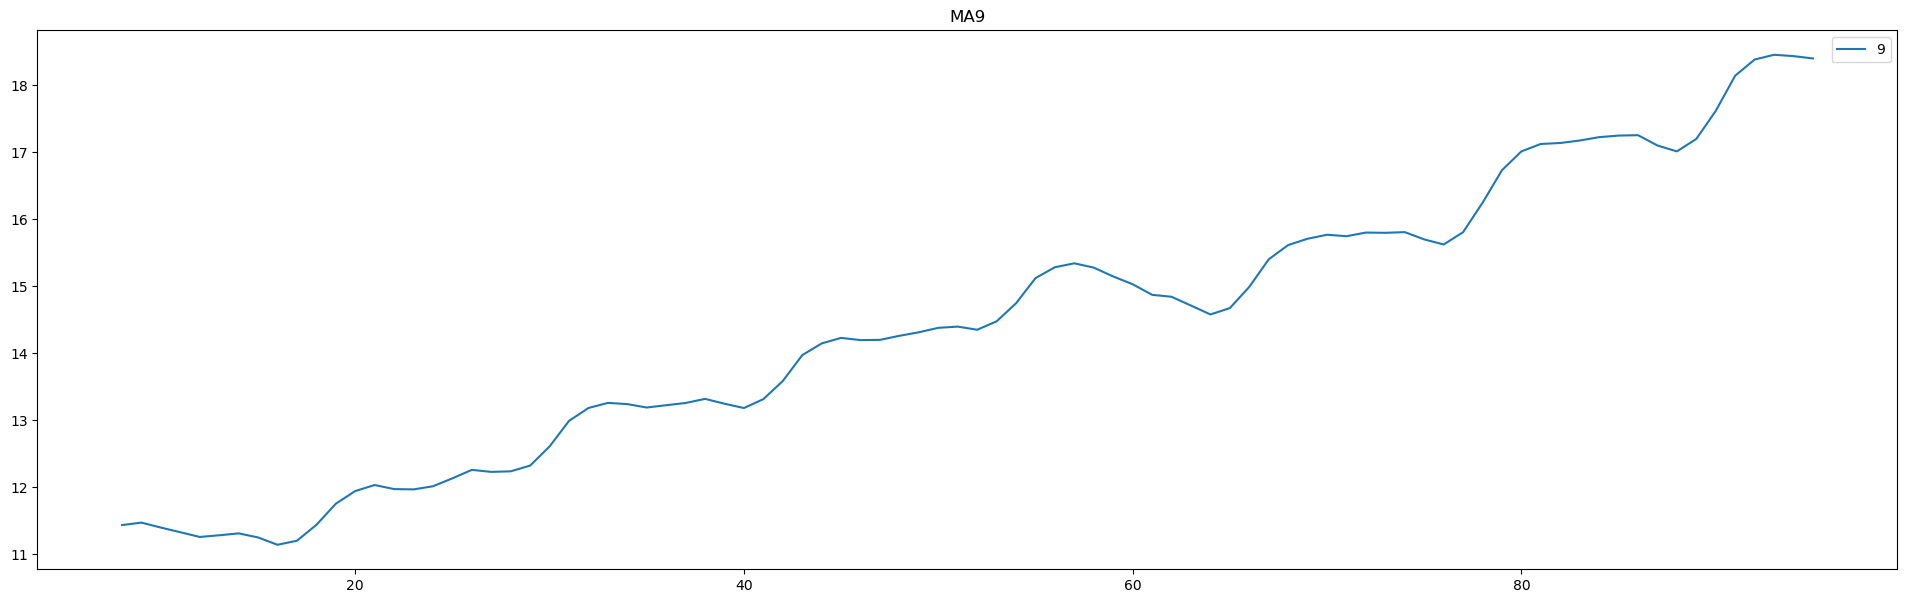

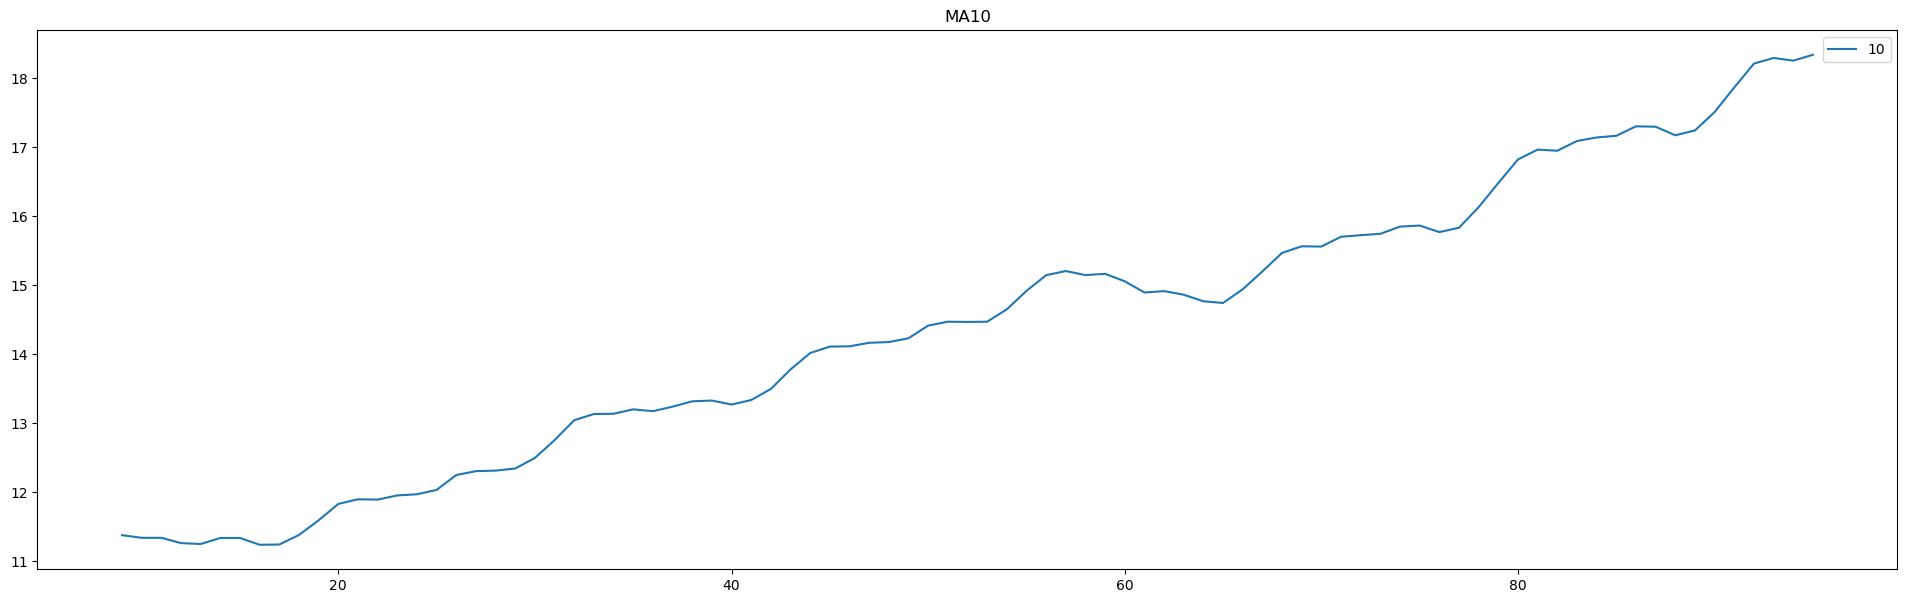

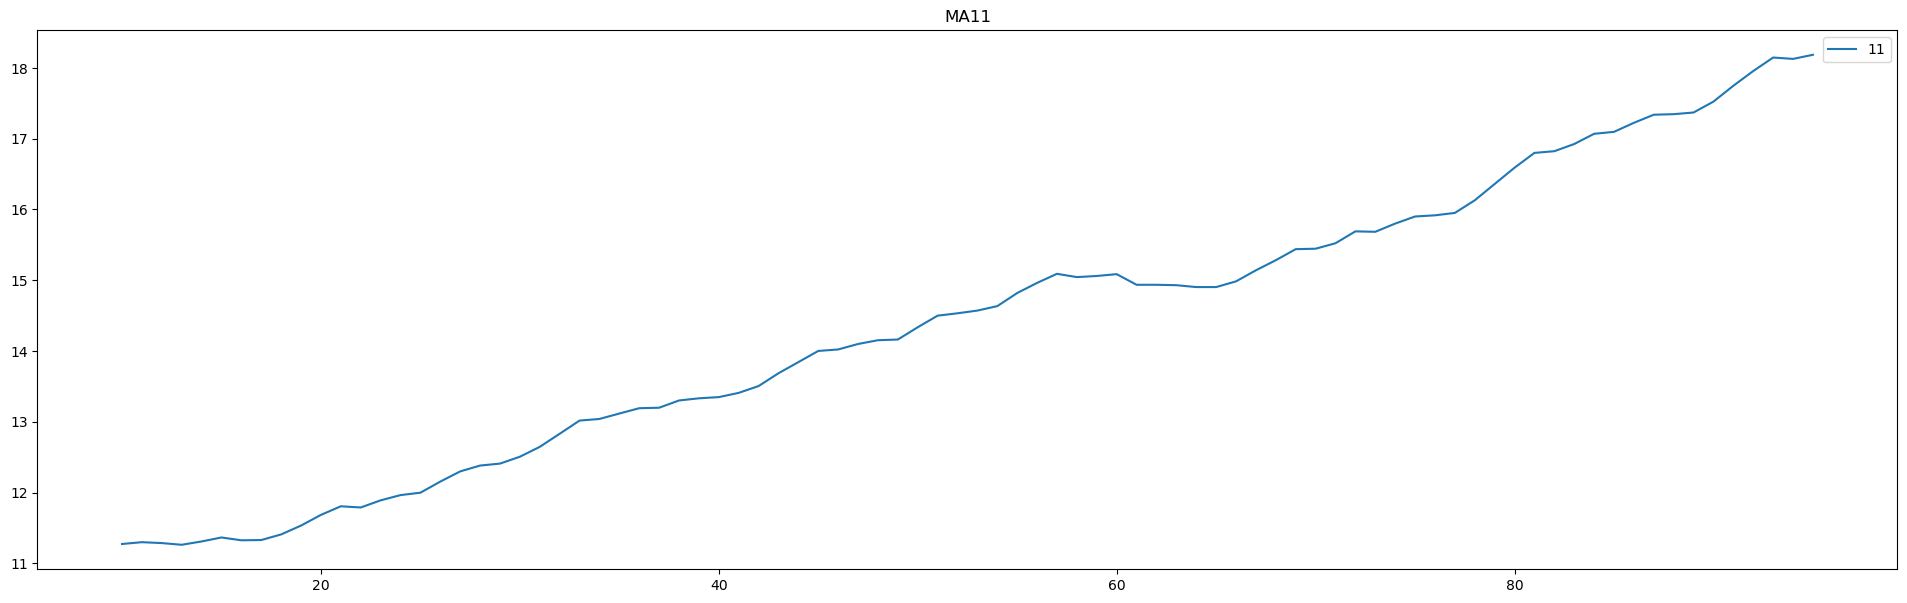

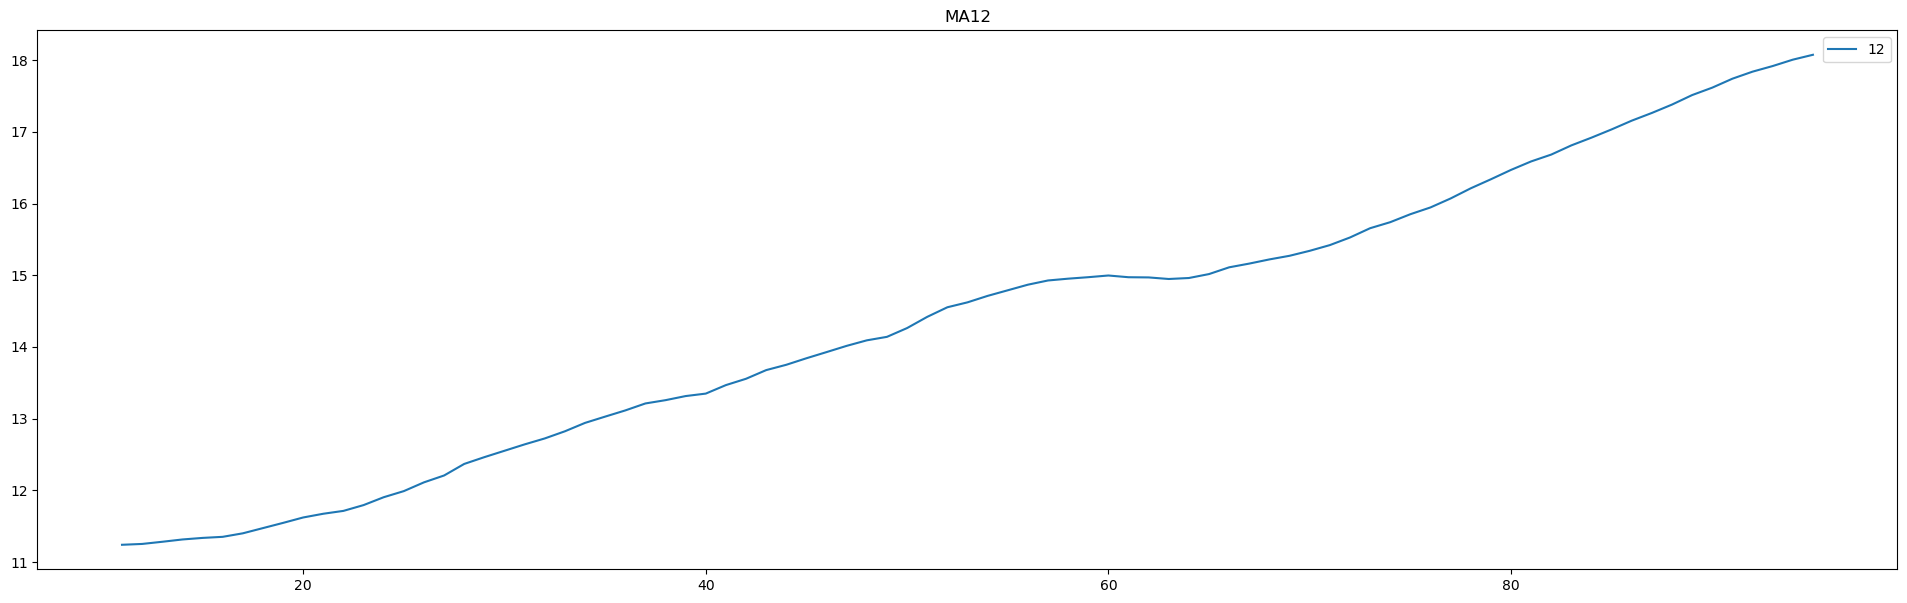

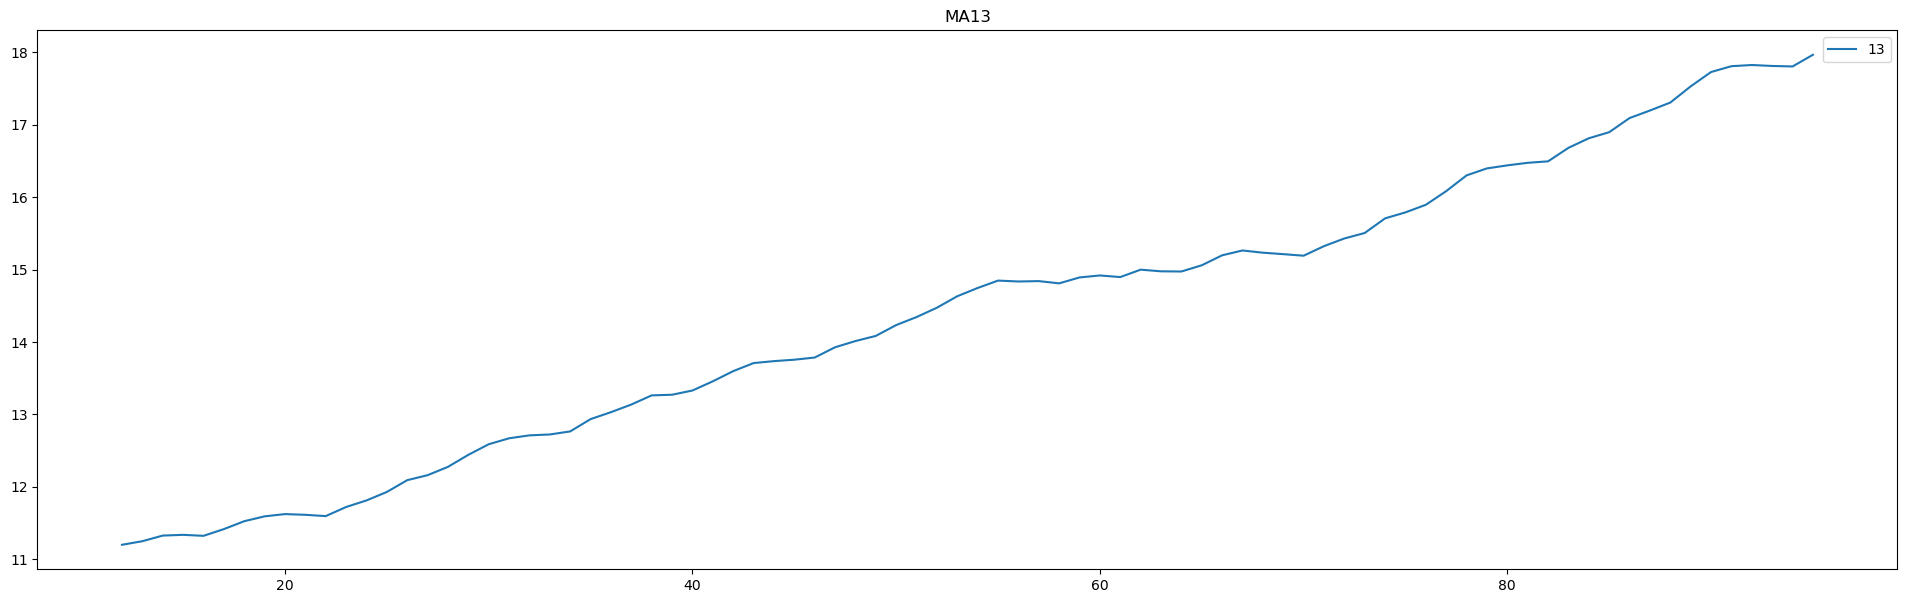

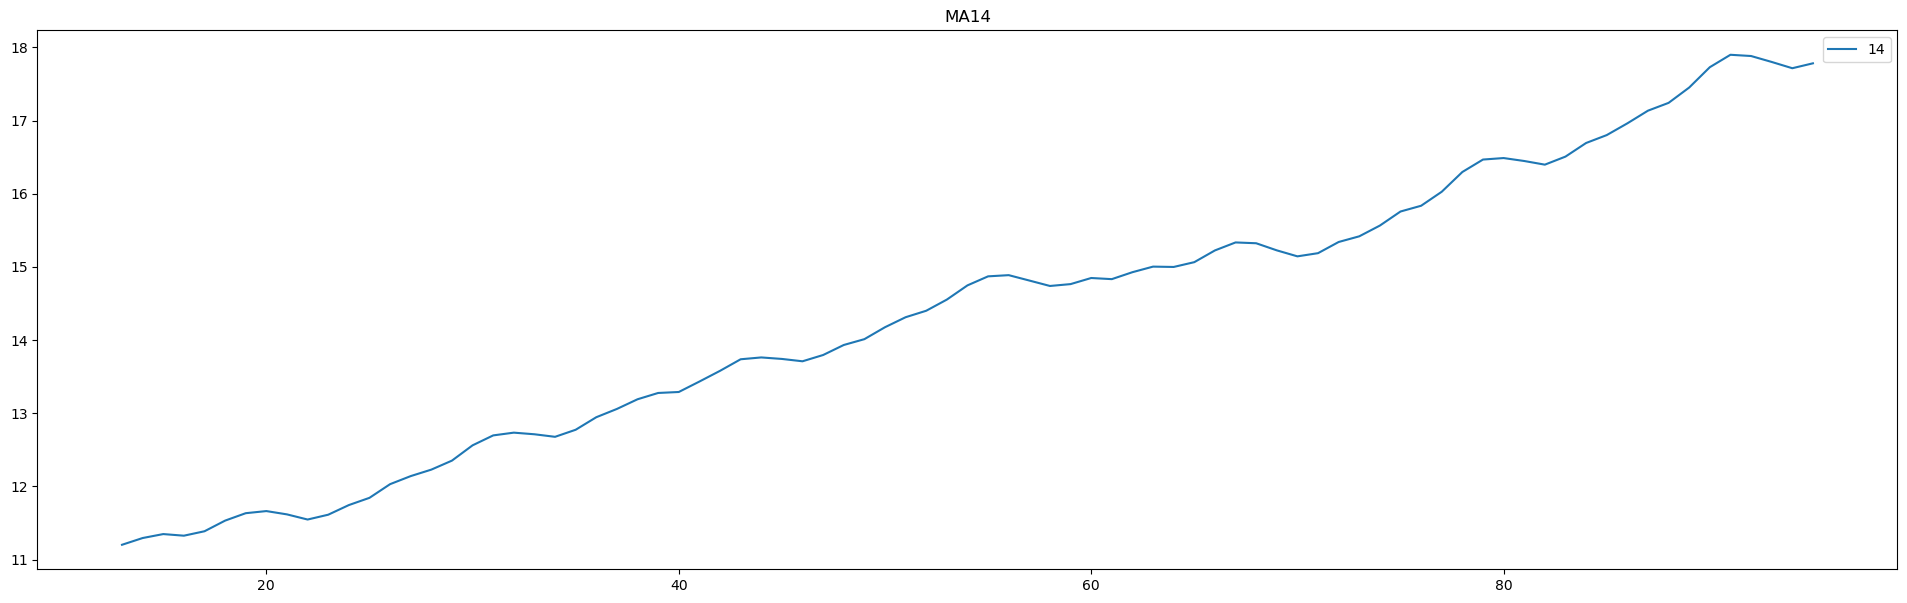

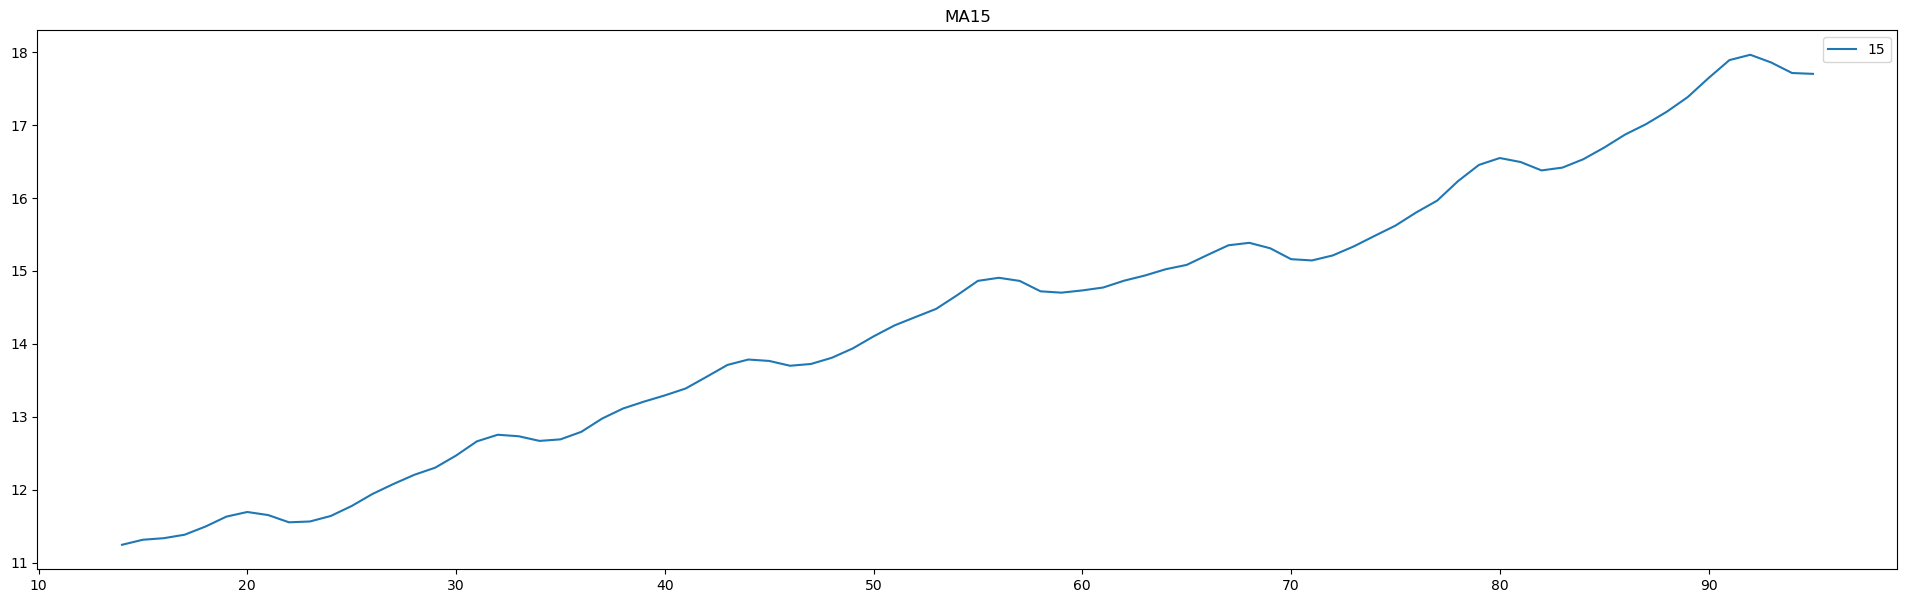

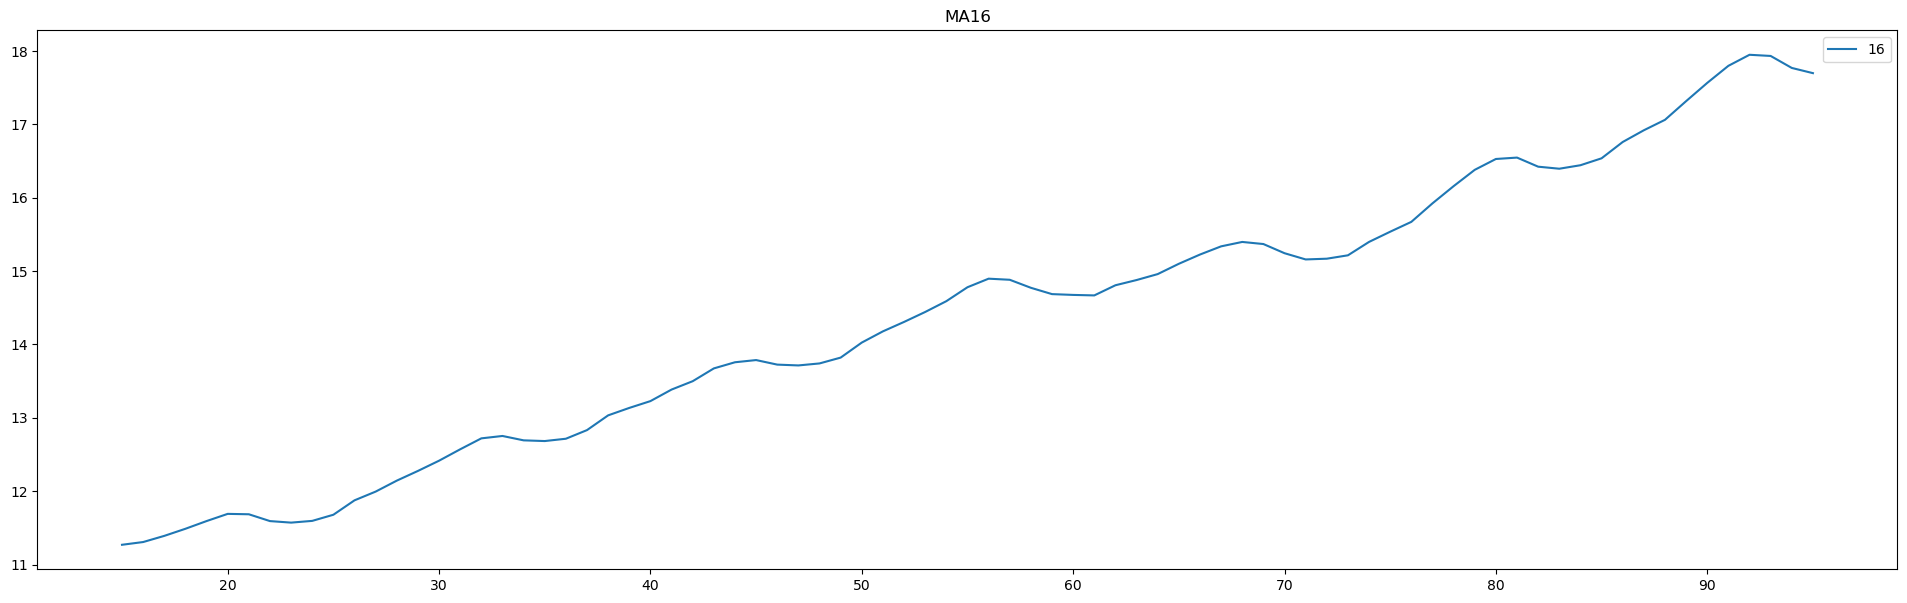

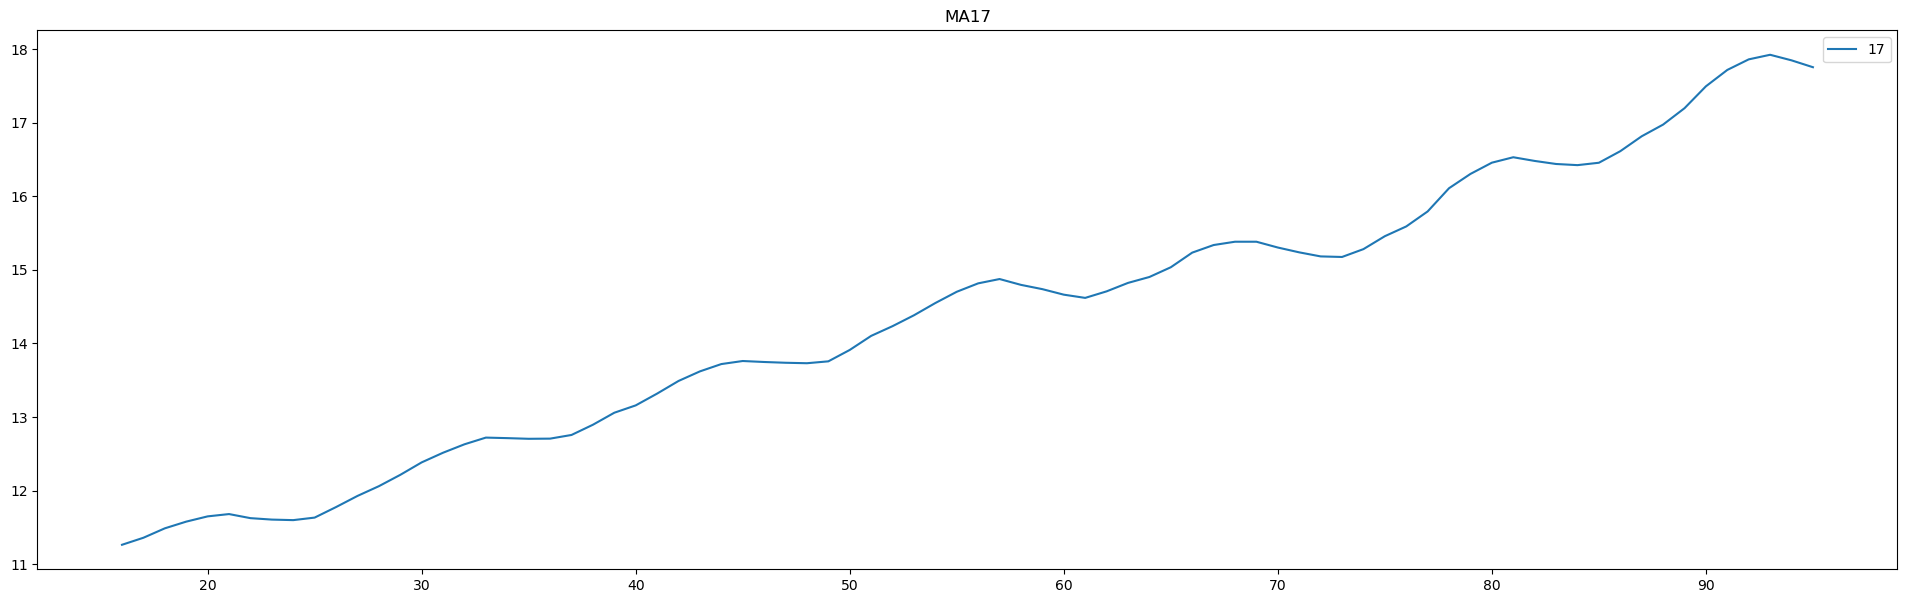

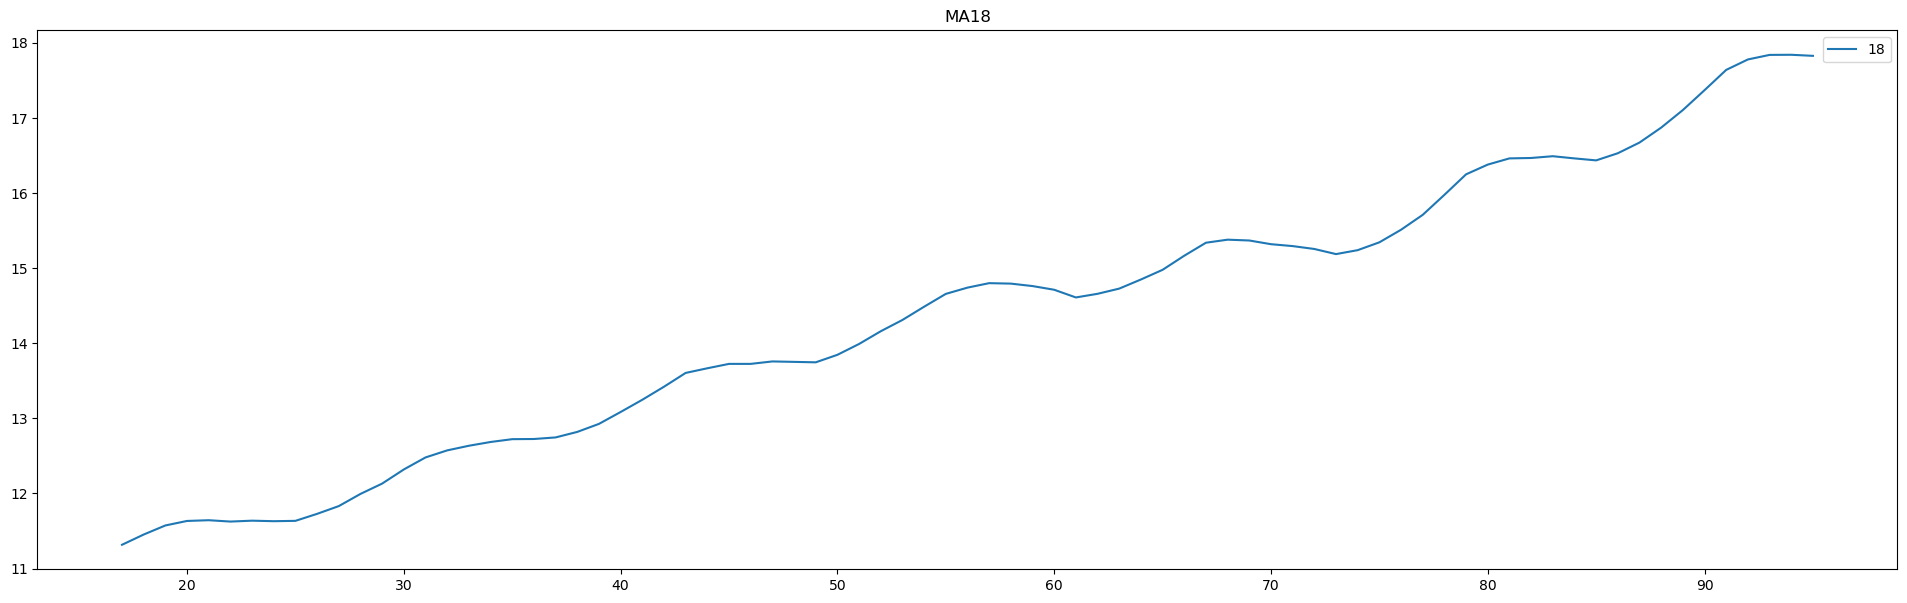

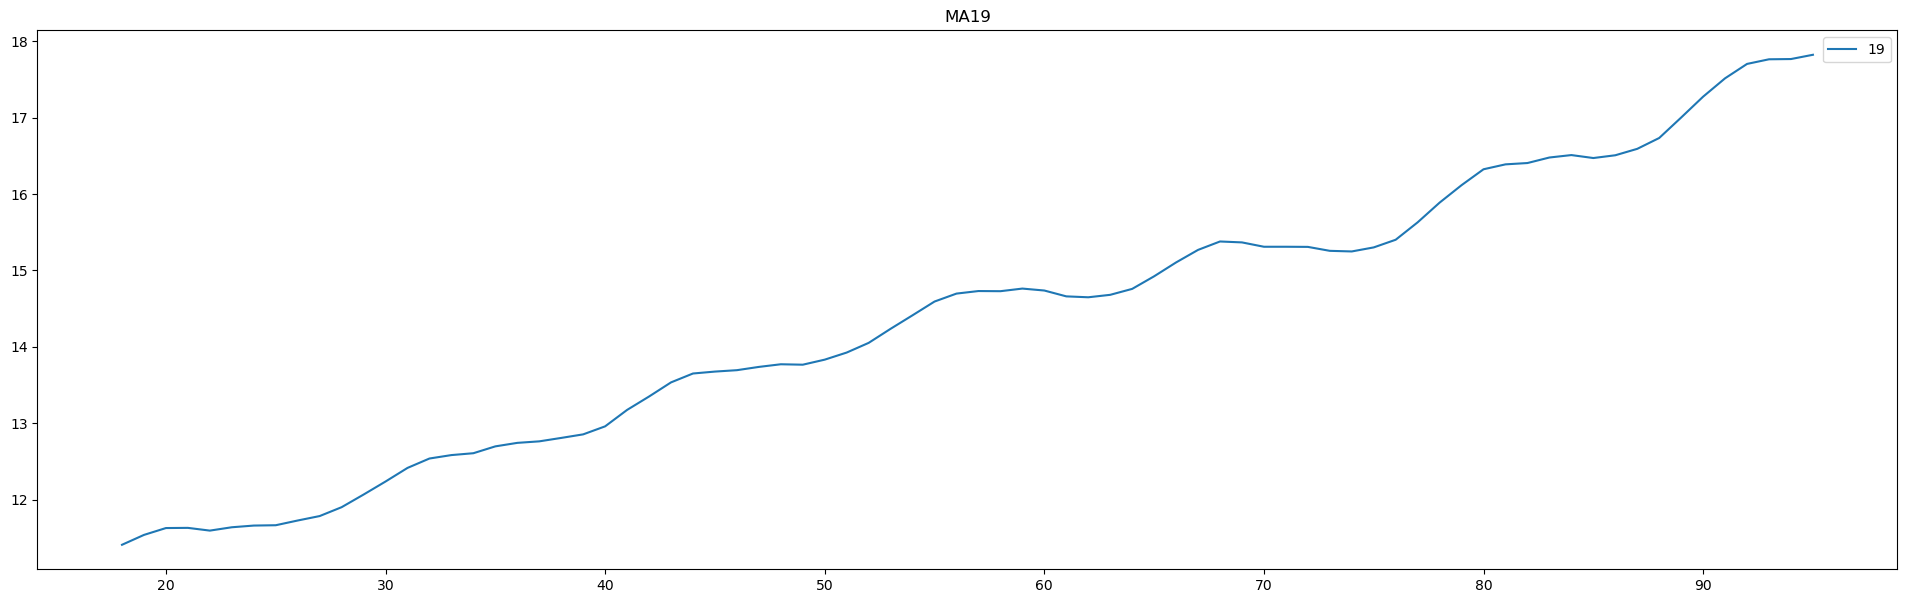

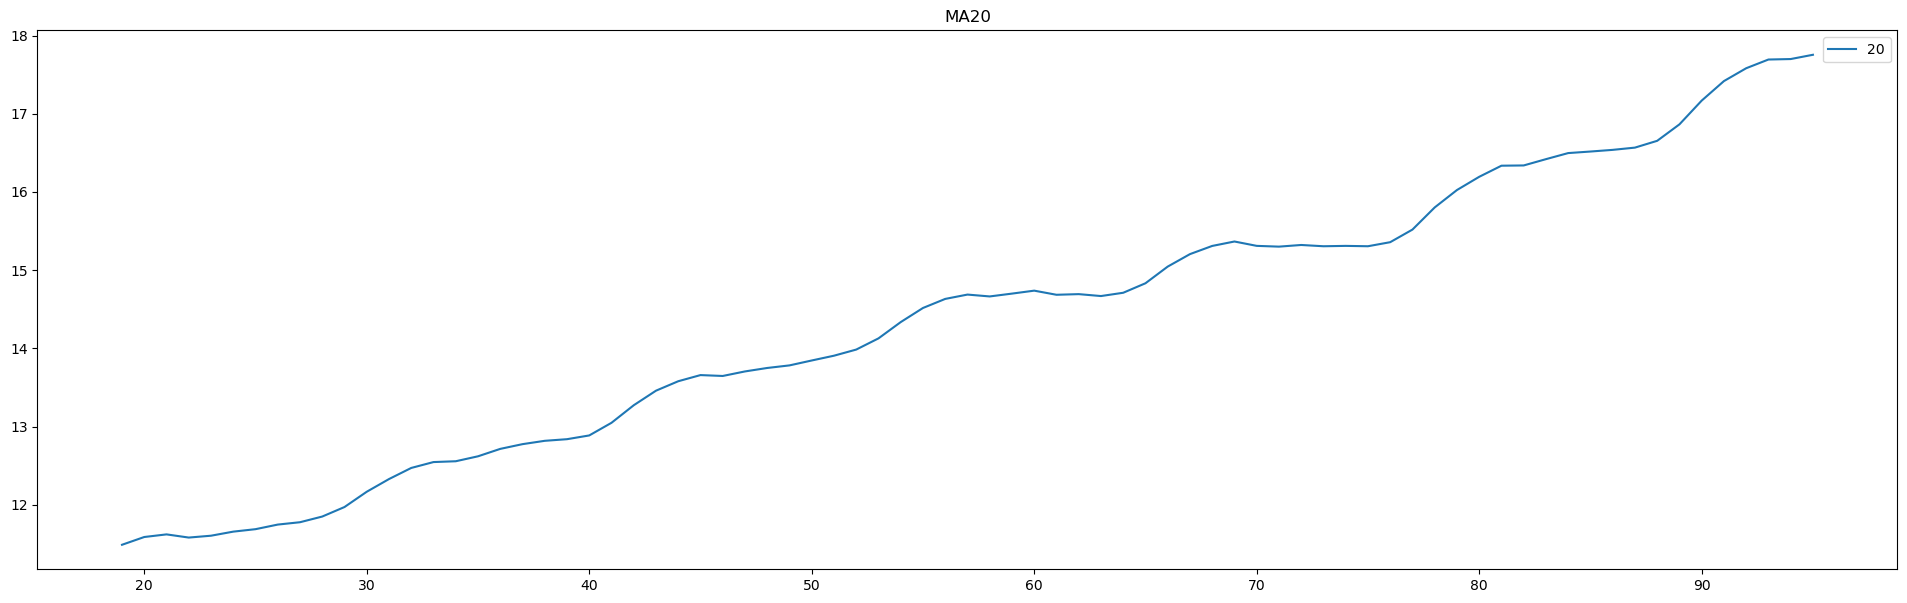

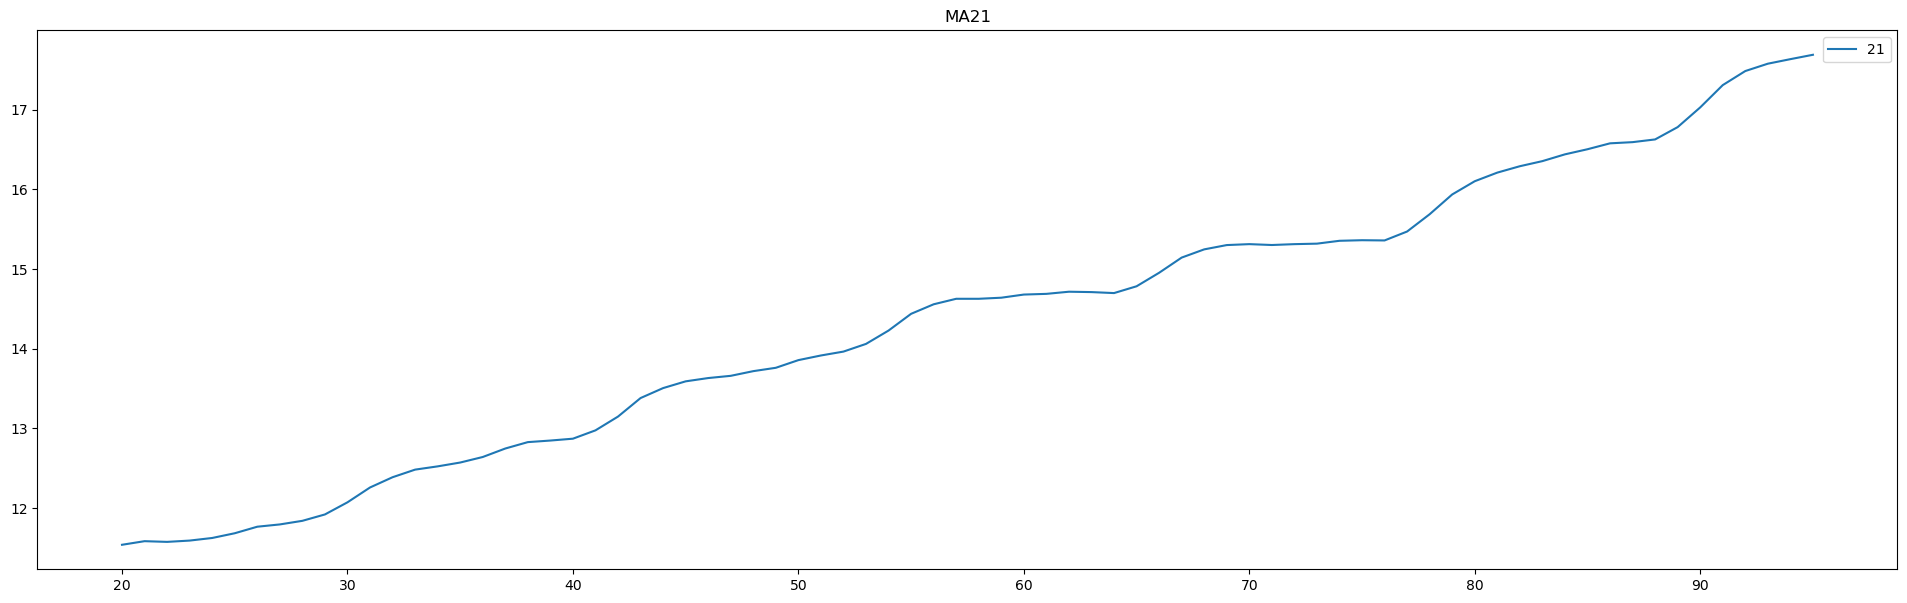

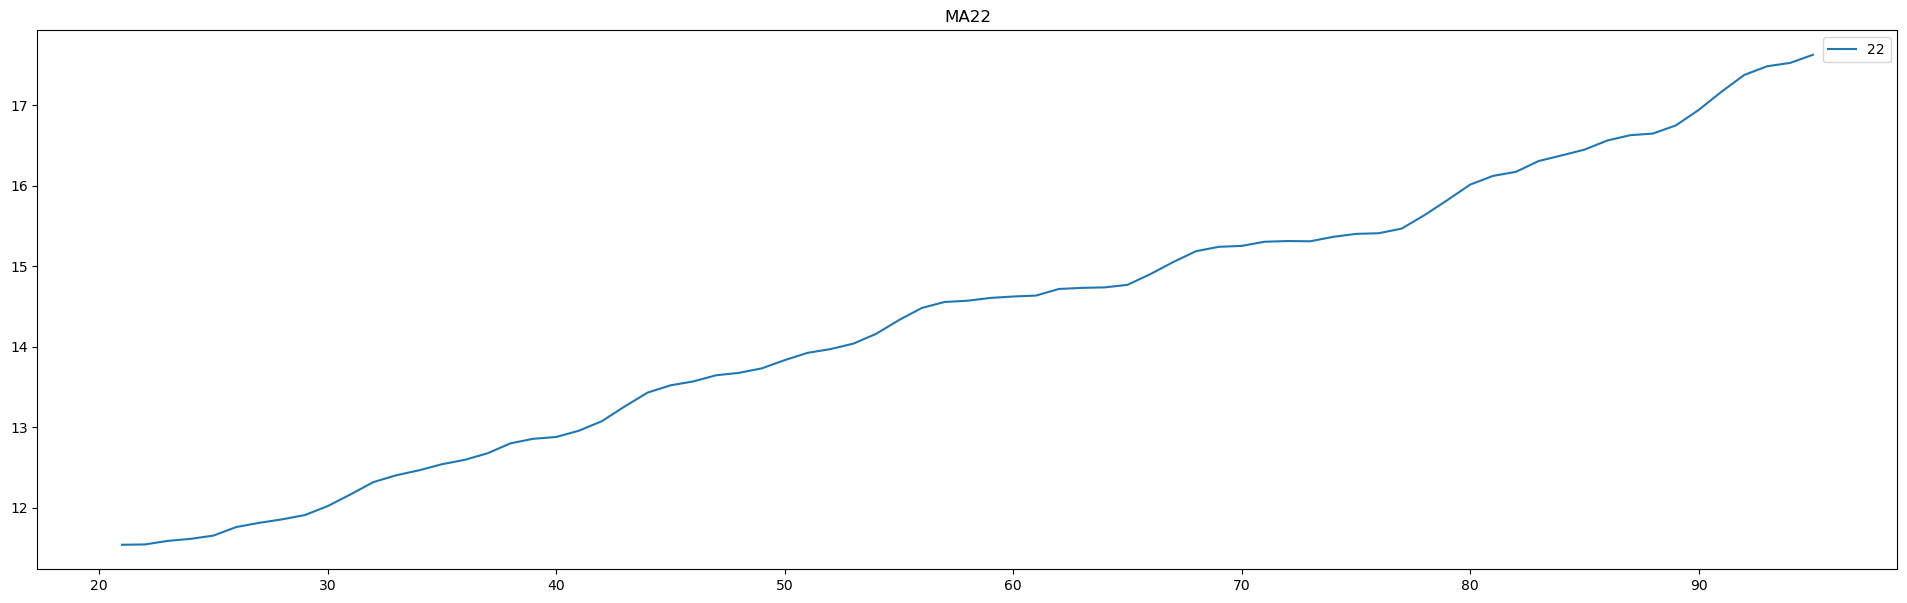

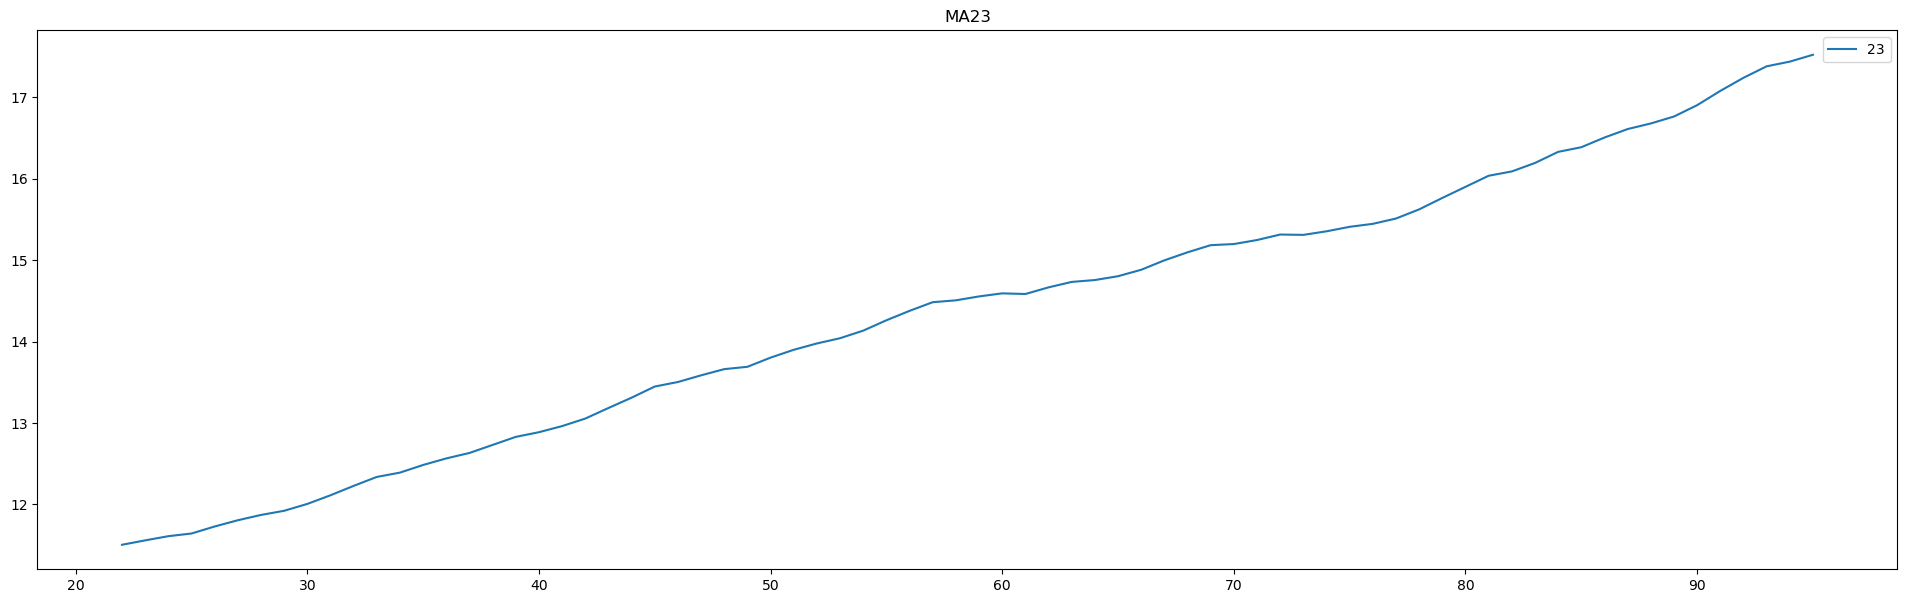

In [304]:
plt.figure(figsize=(24,7))
data.Passengers.plot(label="org")
for i in range(2,24):
    plt.figure(figsize=(24,7))
    data["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("MA"+str(i))
    plt.legend(loc='best')
    plt.show()

# Time series decomposition plot
      - It is use for finding proper Trends,Seasonality of Target column

<Figure size 2400x2000 with 0 Axes>

<Figure size 2400x2000 with 0 Axes>

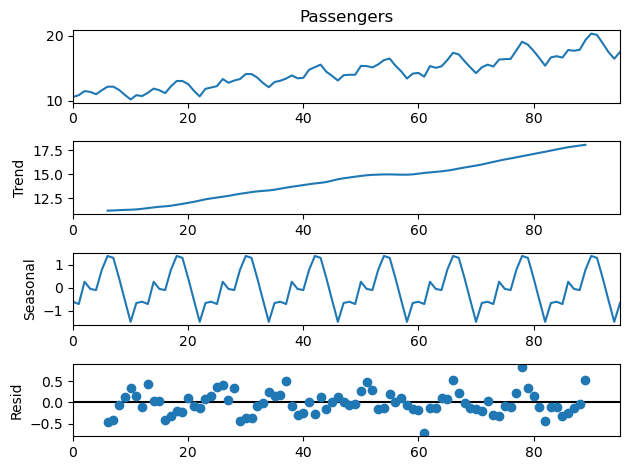

<Figure size 2400x2000 with 0 Axes>

In [305]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(24,20))
decompose_ts_add = seasonal_decompose(data.Passengers,period= 12) 
decompose_ts_add.plot()
plt.figure(figsize=(24,20))


- It shows Trend is Exponential and Sesonality is Multiplicative

In [306]:
# Data preprocessing for models
data['Month'] = pd.to_datetime(data['Month'])
data['Months'] = data['Month'].dt.strftime('%b')
data.head()

,Month,Passengers,Months
0,1995-01-01,10.583005,Jan
1,1995-02-01,10.862780,Feb
2,1995-03-01,11.489125,Mar
3,1995-04-01,11.357817,Apr
4,1995-05-01,11.000000,May


In [307]:
month_dummies = pd.DataFrame(pd.get_dummies(data['Months']))
data1 = pd.concat([data,month_dummies],axis = 1)
data1.head()

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,10.583005,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,10.862780,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,11.489125,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,11.357817,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,11.000000,May,0,0,0,0,0,0,0,0,1,0,0,0


In [308]:
data1["t"] = np.arange(1,97)
data1["t_squared"] = data1["t"]*data1["t"]
data1["log_Passengers"] = np.log(data1["Passengers"])
data1.columns
data1.head()

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1995-01-01,10.583005,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,2.359249
1,1995-02-01,10.862780,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,2.385342
2,1995-03-01,11.489125,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,2.441401
3,1995-04-01,11.357817,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,2.429906
4,1995-05-01,11.000000,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,2.397895


# ACF plots and PACF plots
   - ACF -Autocorrelation plot
   - PACF-Partial auto-correlation function

C:\Users\PallaviJadhav\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


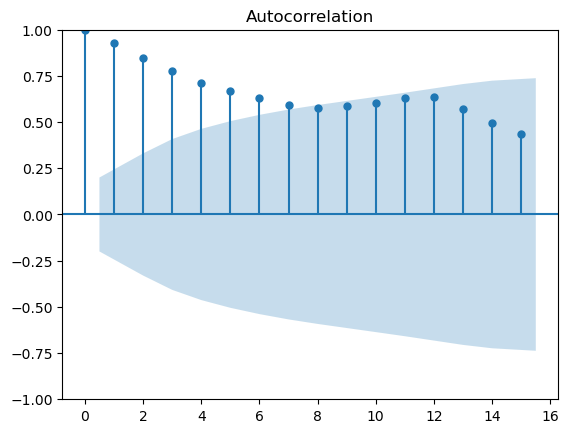

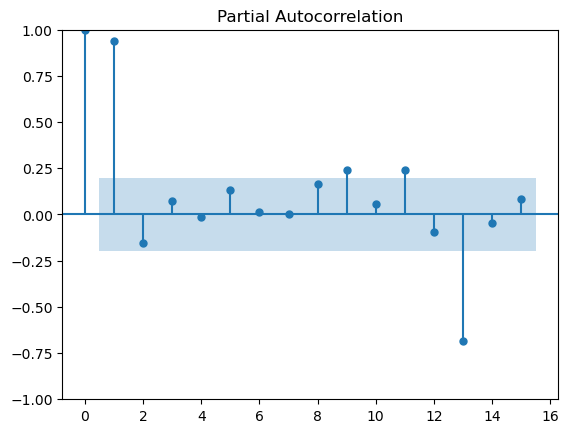

In [309]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=15)
tsa_plots.plot_pacf(data.Passengers,lags=15)
plt.show()

By acf plot , we can say that forcasting is possible upto 6 lag

# Split Train and Test Data

In [310]:
data1.shape

(96, 18)

In [311]:
# Segreate the Train & Test Data
train=data1.head(75)
test=data1.tail(25)

- Their are two forcasting models
1. Data Driven models
2. Model based

# Linear Model

In [312]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))                 # Predict on test data
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2)) # Calculate RMSE --> test -predict_linear
print("RMSE Linear: ",rmse_linear)

RMSE Linear:  1.309298278462404


# Exponential Model

In [313]:
Exp = smf.ols('log_Passengers~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
print("RMSE Exponential: ",rmse_Exp)

RMSE Exponential:  1.192822996843944


# Quadratic Model

In [314]:
Quad = smf.ols('Passengers~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
print("RMSE Quadratic: ",rmse_Quad)

RMSE Quadratic:  1.532785798940432


# Additive Seasonality Model

In [315]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
print("RMSE Additive seasonality: ",rmse_add_sea)

RMSE Additive seasonality:  3.964802243549391


# Additive Seasonality Quadratic Model

In [316]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
print("RMSE Additive Seasonality Quadratic:",rmse_add_sea_quad )

RMSE Additive Seasonality Quadratic: 0.9414012045863057


# Multiplicative Seasonality Model

In [317]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
print("RMSE Multiplicative Seasonality:",rmse_Mult_sea)

RMSE Multiplicative Seasonality: 4.060623869370295


#  Multiplicative Additive Seasonality Model

In [318]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_Mult_add_sea )

RMSE Multiplicative Additive Seasonality: 0.31669615482803726


In [319]:
data2 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data2)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,1.309298
1,rmse_Exp,1.192823
2,rmse_Quad,1.532786
3,rmse_add_sea,3.964802
4,rmse_add_sea_quad,0.941401
5,rmse_Mult_sea,4.060624
6,rmse_Mult_add_sea,0.316696


From above table ,Multiplicative Additive Seasonality model has less RMSE value.

So,we can consider this value for model building

In [320]:
data = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec']]
forecast = pd.DataFrame(data, columns = ['Date', 'Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-5-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [321]:
# Create dummies & T and T-Squared columns

dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["t"] = np.arange(1,13)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
print("\nDummy, T and T-Square\n\n",forecast1.head())


Dummy, T and T-Square

          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4   2003-5-01    May    0    0    0    0    0    0    0    0    1    0    0   

   Sep  t  t_squared  
0    0  1          1  
1    0  2          4  
2    0  3          9  
3    0  4         16  
4    0  5         25  


In [322]:
# Forecasting using Multiplicative Additive Seasonality Model

model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =data1).fit()
pred_new  = pd.Series(model_full.predict(forecast1))

forecast1["Forecasted_log"] = pd.Series(pred_new)
forecast1['Forecasted_Passengers'] = np.exp(forecast1['Forecasted_log'])


In [323]:
# Final Prediction for next 12 months

Final_predict = forecast1.loc[:, ['Date', 'Forecasted_Passengers']] 
Final_predict

,Date,Forecasted_Passengers
0,2003-01-01,10.448739
1,2003-02-01,10.503868
2,2003-03-01,11.283405
3,2003-04-01,11.099576
4,2003-5-01,11.063434
5,2003-06-01,11.770149
6,2003-07-01,12.412371
7,2003-08-01,12.399242
8,2003-09-01,11.734297
9,2003-10-01,10.995214
